# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Haozhe Wang
*   **Student number**: 



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

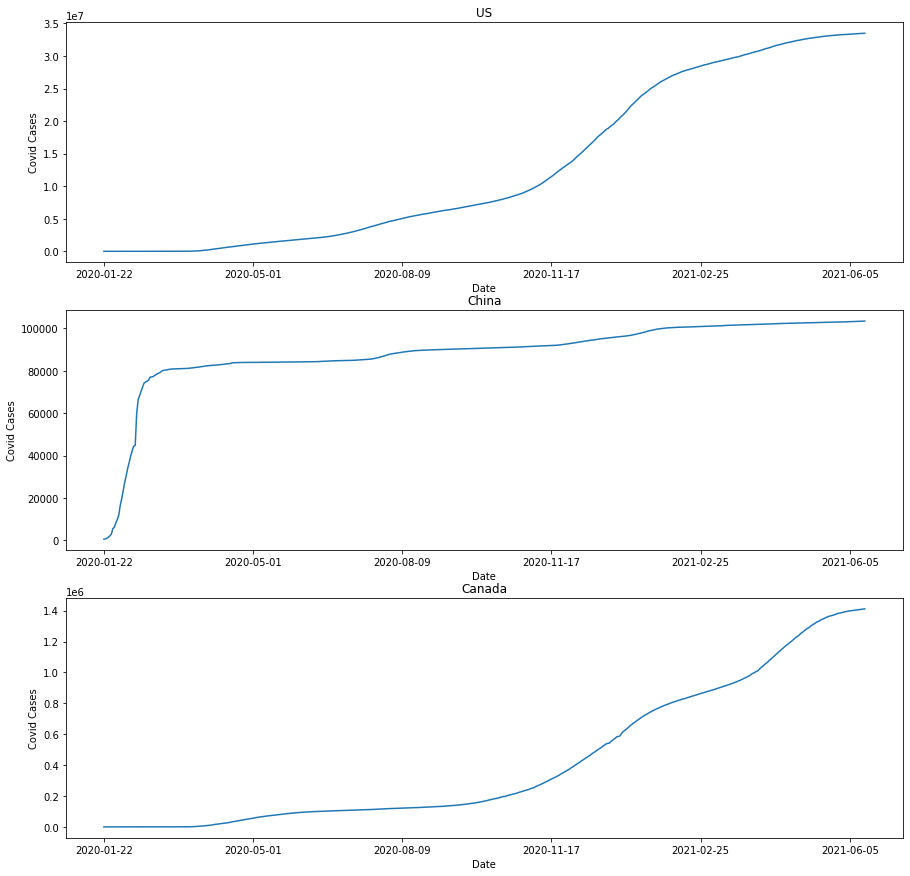

In [ ]:
### YOUR CODE HERE ###

import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Covid = cases_raw

countryName = []
countryData = []

for counter1 in ['US', 'China', 'Canada']:
  countryName.append(counter1)
  countryData.append(Covid.loc[counter1])

plt1 = plt.figure()

for counter1 in range(3):
  plt.subplot(3, 1, (counter1+1))
  Covid.loc[countryName[counter1], :].plot(figsize = (15,15))
  plt.xlabel('Date')
  plt.ylabel('Covid Cases')
  plt.title(countryName[counter1])

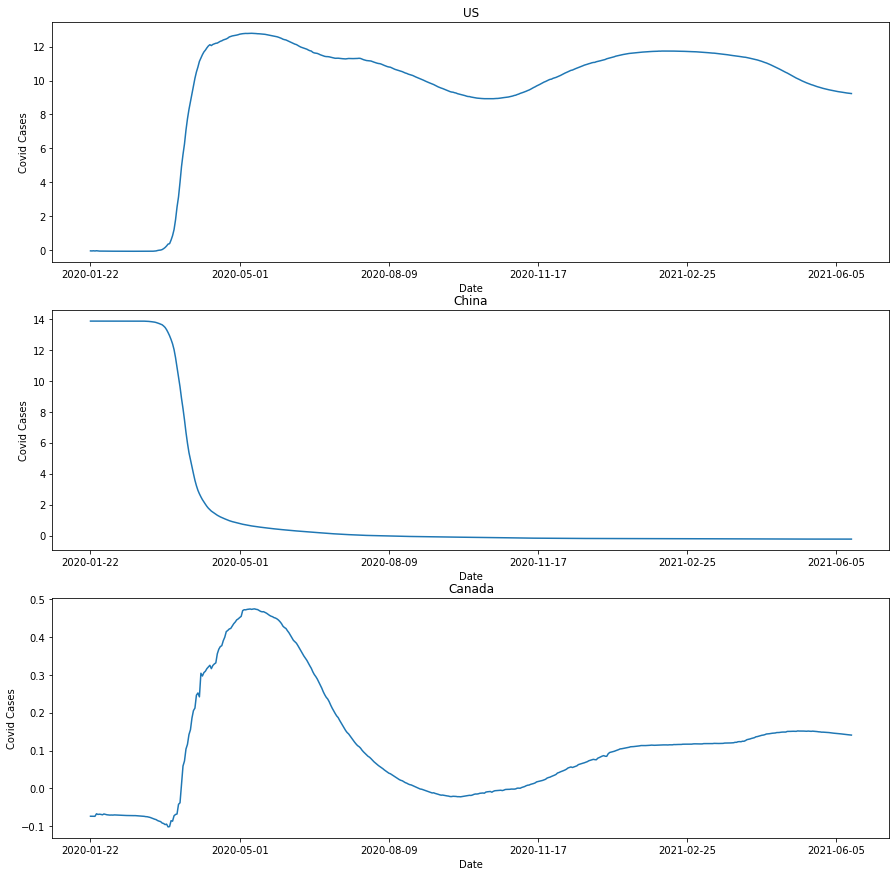

In [ ]:
# Apply StandardScalar and plot again

dataset = Covid.values.astype(int)
dataset_std = StandardScaler().fit_transform(dataset)
columns = Covid.columns
index = Covid.index

Covid_std = pd.DataFrame(dataset_std, columns = columns, index = index)

countryName = []
countryData = []

for counter1 in ['US', 'China', 'Canada']:
  countryName.append(counter1)
  countryData.append(Covid_std.loc[counter1])

plt1 = plt.figure()

for counter1 in range(3):
  plt.subplot(3, 1, (counter1+1))
  Covid_std.loc[countryName[counter1], :].plot(figsize = (15,15))
  plt.xlabel('Date')
  plt.ylabel('Covid Cases')
  plt.title(countryName[counter1])

**Discussion:**

**US**: In the first two months of 2020 the proportion of US Covid cases started at a low level, but rose at a horrible rate in March and remained high afterward.

**China**: The proportion of China Covid cases started at an extremely high level In the first two months, but significantly dropped in April and remained low since then.

**Canada**: The proportion of Canada Covid cases started below average, rose suddenly in March, and gradually decreased to average. After October 2020, it has stayed at a little bit higher level than average.

The rising trend curve refers to a larger proportion of new Covid cases than before in the world, and the declining trend curve means a smaller proportion of new Covid cases than before.

The sign of value indicates whether the number of new Covid cases is beyond the world average or not. This means a negative value in the trend does not indicate a negative number of cases, but a proportion of new cases below the world average.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

## 1. Compute the covariance matrix of the dataframe

n, m = dataset_std.shape
Covid_cov = np.dot(dataset_std.T, dataset_std) / (n-1)
Covid_cov.shape

(511, 511)

In [ ]:
## 2. Write a function to return sorted eigenvalues and eigenvectors

def get_sorted_eigen(df_cov):
  # Ascending Order
  eigen_value, eigen_vector = np.linalg.eigh(df_cov)

  # Descending Order → scree plot
  args = (-eigen_value).argsort()
  eigen_value = eigen_value[args]
  eigen_vector = eigen_vector[:, args]

  return eigen_value, eigen_vector

eigen_value, eigen_vector = get_sorted_eigen(Covid_cov)

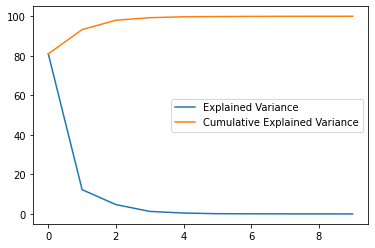

In [ ]:
## 3. Show the effectiveness of the principal components with a scree plot

eigen_value_sum = sum(eigen_value)
exp_var = [100 * value/eigen_value_sum for value in eigen_value]
cum_exp_var = np.cumsum(exp_var)

plt.plot(exp_var[:10], label = 'Explained Variance')
plt.plot(cum_exp_var[:10], label = 'Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
## 4. Number of PCs needed to cover 99% of the dataset's variance

for counter1 in range(10):
  if cum_exp_var[:10][counter1] >= 99.0:  break

print('Number of PCs needed: ', counter1+1)

Number of PCs needed:  4


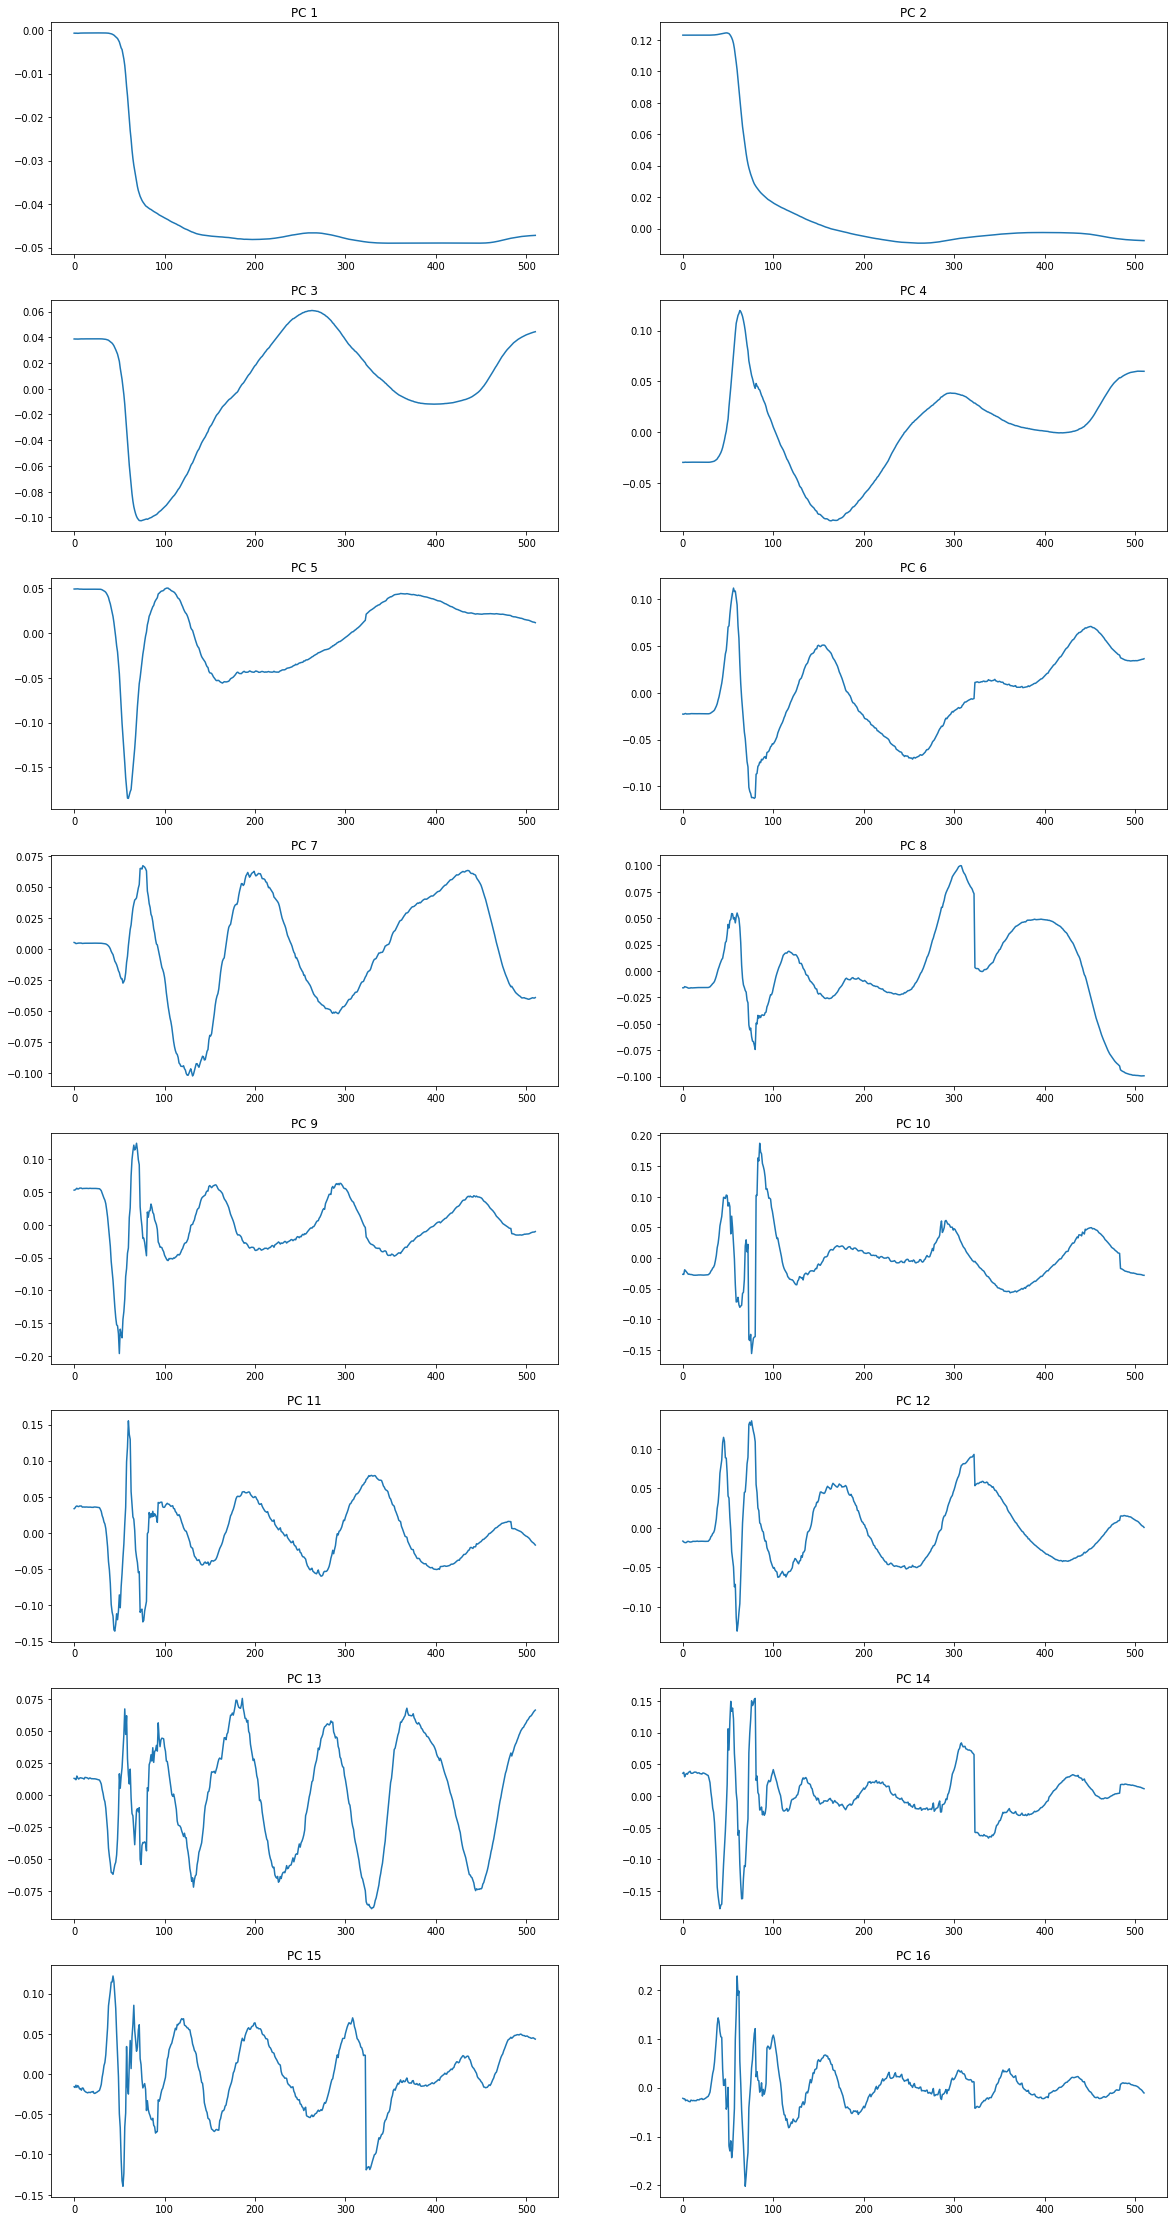

In [ ]:
## 5. Plot the first 16 principal components

eigen_vector_df = pd.DataFrame(eigen_vector, columns = range(1, eigen_vector.shape[1]+1))

plt2 = plt.figure()

for counter1 in range(16):
  plt.subplot(8, 2, (counter1+1))
  eigen_vector_df.loc[:,counter1+1].plot(figsize=(20,40))
  plt.title('PC {}'.format(counter1+1))

**6.Comparison**

We could notice that the first few eigenvectors seem to represent certain trends of the data.

The first and second eigenvectors represent the trend of monotonically decreasing;

The third and fifth eigenvectors represent the trend of dropping at the first time and then gradually rising.

The fourth and sixth eigenvectors represent the trend of rising at the first time and then gradually dropping.

For the rest of the eigenvectors, they seem to fluctuate rapidly without noticeable patterns, which means they are supposed to capture some insignificant pattern of the data.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
def plot_country_figures(original_df, country_name):
### YOUR CODE HERE ###

  import numpy as np
  import pandas as pd
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error

  # 1. Plot the original time-series for the specified country

  plt.subplot(4, 1, 1)
  original_df.loc[country_name,:].plot(figsize=(10,12))
  plt.title('Original Time-Series for '+ country_name)
  plt.xlabel('Date')
  plt.ylabel('Original Data cf World')

  # 2. The incremental reconstruction of the original time-series for the specified country in a single plot

  plt.subplot(4, 1, 2)

  scaler = StandardScaler()
  std_np = scaler.fit_transform(original_df)
  columns = original_df.columns
  index = original_df.index
  std_df = pd.DataFrame(std_np, columns = columns, index = index)

  reconstruction_image = []

  for num_eigen_vector in [0, 1, 3, 7, 15]:
    W = eigen_vector[:, 0:num_eigen_vector]
    project = np.dot(std_df.loc[country_name,:].values, eigen_vector[:, 0:num_eigen_vector])
    reconstruction = scaler.inverse_transform(np.dot(project, W.T))
    reconstruction_image.append(reconstruction.reshape(std_df.shape[1]))

  num_eigen_vector = [0, 1, 3, 7, 15]

  for counter1 in range(5):
    PC_index = num_eigen_vector[counter1] + 1
    reconstruction_data = reconstruction_image[counter1]        
    plt.plot(reconstruction_data, label='PC 1 to PC {}'.format(PC_index))
    plt.title('Incremental Reconstruction of Standardized Time-Series for '+ country_name)
    plt.xlabel('Date')
    plt.ylabel('Standardized Data cf World')
    plt.legend()

  # 3. The residual error for the best reconstruction with respect to the original time-series

  # Sweep x-axis from 1 to 10

  reconstruction_image = []

  for num_eigen_vector in range(10):
    W = eigen_vector[:, 0:num_eigen_vector]
    project = np.dot(std_df.loc[country_name,:].values, eigen_vector[:, 0:num_eigen_vector])
    reconstruction = scaler.inverse_transform(np.dot(project, W.T))
    reconstruction_image.append(reconstruction.reshape(std_df.shape[1]))

  rmse_list = []
  residual_list = []
  residual_error_list = []

  for counter1 in range(10):
    residual = reconstruction_image[counter1] - original_df.loc[country_name,:].values
    residual_error_list.append(residual.mean())
    residual_list.append(residual)
    rmse = mean_squared_error(original_df.loc[country_name,:].values, reconstruction_image[counter1].reshape(-1)) ** 0.5
    rmse_list.append(rmse)

  plt.subplot(4, 1, 3)

  for counter1 in range(10):
    PC_index = counter1 + 1
    plt.plot(residual_list[counter1], label='PC 1 to PC {}'.format(PC_index))
    plt.title('Residual Error of Reconstruction for ' + country_name)
    plt.xlabel('Date')
    plt.legend()
    plt.ylabel("Residuals")

  # 4. The RMSE of the reconstruction as a function of the number of included components

  plt.subplot(4, 1, 4)

  plt.plot(rmse_list)
  plt.title('RMSE for '+ country_name)
  plt.xlabel('Number of PC')
  plt.ylabel("RMSE")

  plt.tight_layout()
  plt.show()

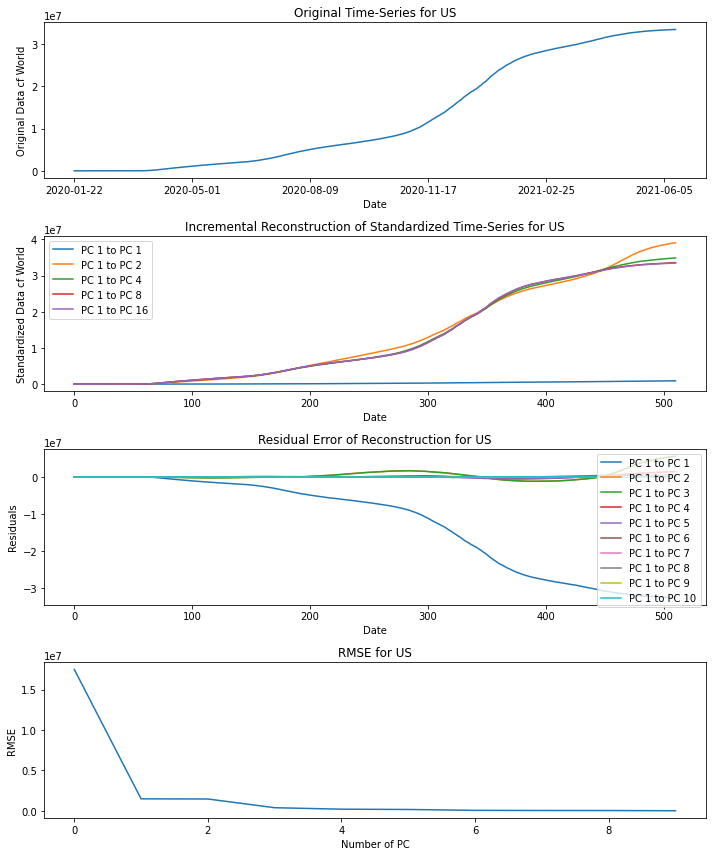

In [ ]:
plot_country_figures(Covid, 'US')

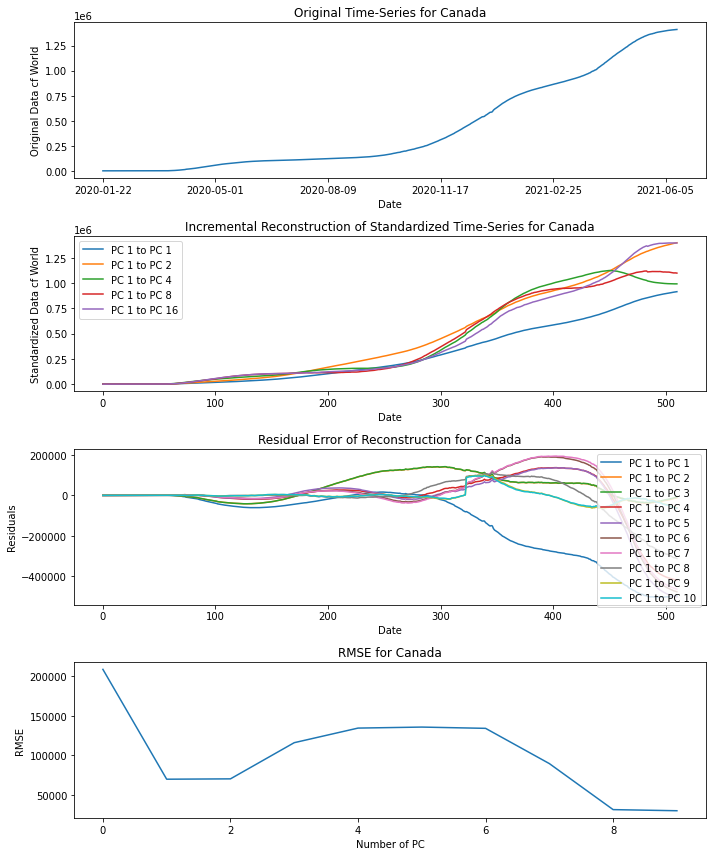

In [ ]:
plot_country_figures(Covid, 'Canada')

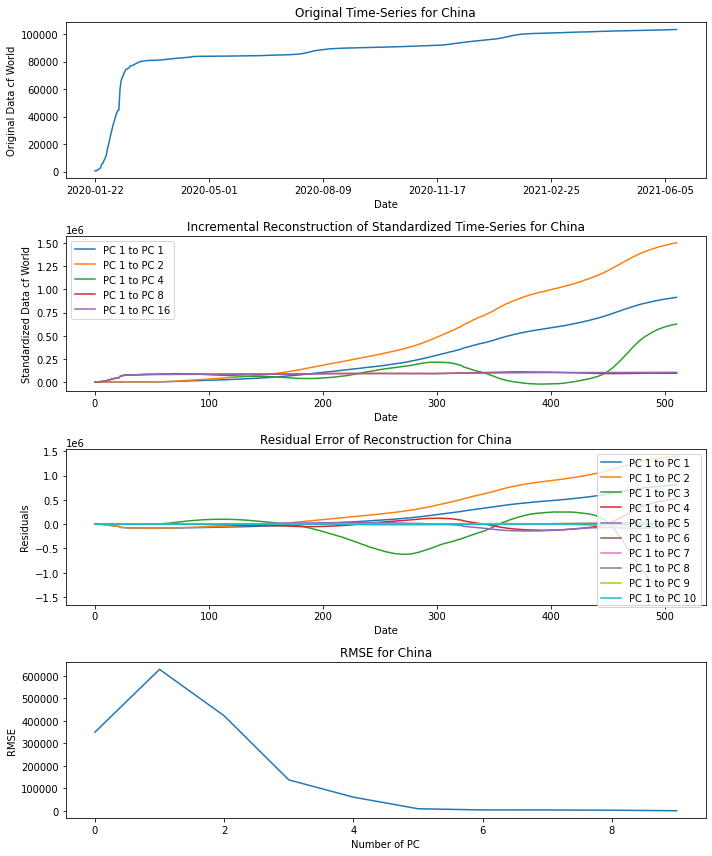

In [ ]:
plot_country_figures(Covid, 'China')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
### YOUR CODE HERE ###

def plot_country_figures_svd(original_df, country_name):

  import numpy as np
  import pandas as pd
  from sklearn.metrics import mean_squared_error
  from sklearn.decomposition import TruncatedSVD

  # 1. Plot the original time-series for the specified country

  plt.subplot(4, 1, 1)
  original_df.loc[country_name,:].plot(figsize=(10,12))
  plt.title('Original Time-Series for '+ country_name)
  plt.xlabel('Date')
  plt.ylabel('Original Data cf World')

  # 2. The incremental reconstruction of the original time-series for the specified country in a single plot

  plt.subplot(4, 1, 2)

  scaler = StandardScaler()
  std_np = scaler.fit_transform(original_df)
  columns = original_df.columns
  index = original_df.index
  std_df = pd.DataFrame(std_np, columns = columns, index = index)

  reconstruction_image = []
  country_data = std_df.loc[country_name,:].values.reshape(1,-1)
  columns = std_df.columns
  country_data_df = pd.DataFrame(country_data, columns = columns)

  for n_elements in [1, 2, 4, 8, 16]:

    ## Apply SVD instead of PCA ##

    # Fit SVD
    svd = TruncatedSVD(n_components = n_elements)
    svd.fit(std_df)
    T = svd.transform(country_data_df)

    # Reconstruct
    reconstruction = scaler.inverse_transform(svd.inverse_transform(T))
    reconstruction_image.append(reconstruction.reshape(std_df.shape[1]))

  n_elements = [1, 2, 4, 8, 16]

  for counter1 in range(5):
    n_elements_index = n_elements[counter1]
    reconstruction_data = reconstruction_image[counter1]        
    plt.plot(reconstruction_data, label='n_elements 1 to {}'.format(n_elements_index))
    plt.title('Incremental Reconstruction of Standardized Time-Series for '+ country_name)
    plt.xlabel('Date')
    plt.ylabel('Standardized Data cf World')
    plt.legend()

  # 3. The residual error for the best reconstruction with respect to the original time-series

  # Sweep x-axis from 1 to 10

  reconstruction_image = []

  for n_elements in range(10):

    # Fit SVD
    svd = TruncatedSVD(n_components = (n_elements + 1))
    svd.fit(std_df)
    T = svd.transform(country_data_df)

    # Reconstruct
    reconstruction = scaler.inverse_transform(svd.inverse_transform(T))
    reconstruction_image.append(reconstruction.reshape(std_df.shape[1]))

  rmse_list = []
  residual_list = []
  residual_error_list = []

  for counter1 in range(10):
    residual = reconstruction_image[counter1] - original_df.loc[country_name,:].values
    residual_error_list.append(residual.mean())
    residual_list.append(residual)
    rmse = mean_squared_error(original_df.loc[country_name,:].values, reconstruction_image[counter1].reshape(-1)) ** 0.5
    rmse_list.append(rmse)

  plt.subplot(4, 1, 3)

  for counter1 in range(10):
    n_elements_index = counter1 + 1
    plt.plot(residual_list[counter1], label='n_components 1 to {}'.format(n_elements_index))
    plt.title('Residual Error of Reconstruction for ' + country_name)
    plt.xlabel('Date')
    plt.legend()
    plt.ylabel("Residuals")

  # 4. The RMSE of the reconstruction as a function of the number of included components

  plt.subplot(4, 1, 4)

  plt.plot(rmse_list)
  plt.title('RMSE for '+ country_name)
  plt.xlabel('Number of n_components')
  plt.ylabel("RMSE")

  plt.tight_layout()
  plt.show()

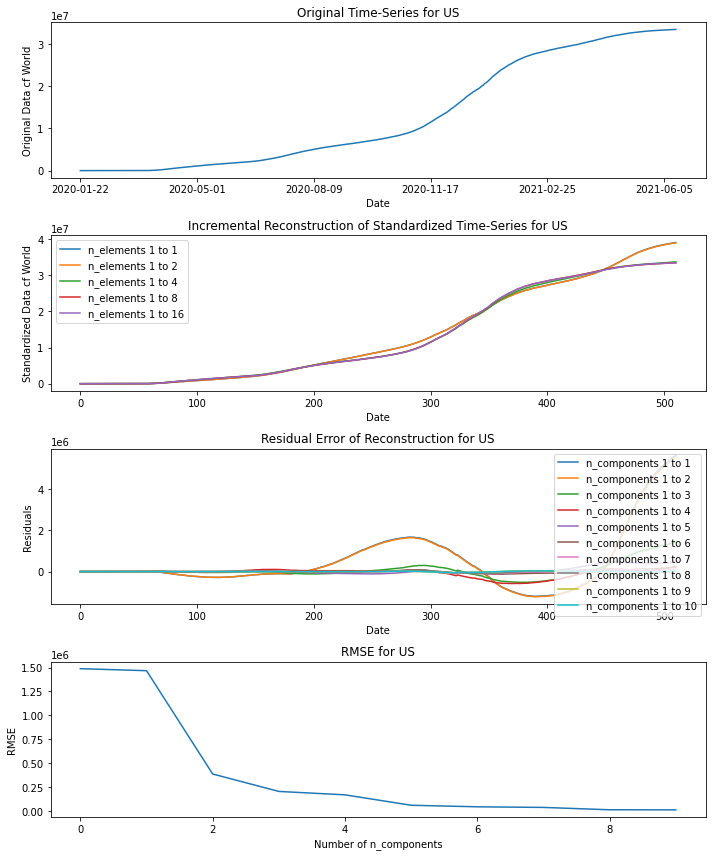

In [ ]:
plot_country_figures_svd(Covid, 'US')

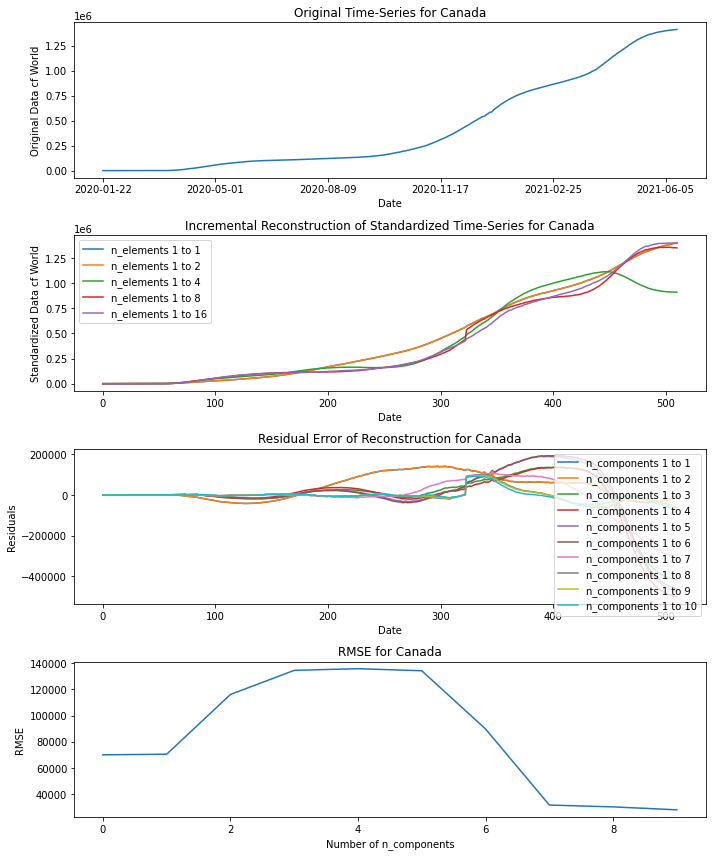

In [ ]:
plot_country_figures_svd(Covid, 'Canada')

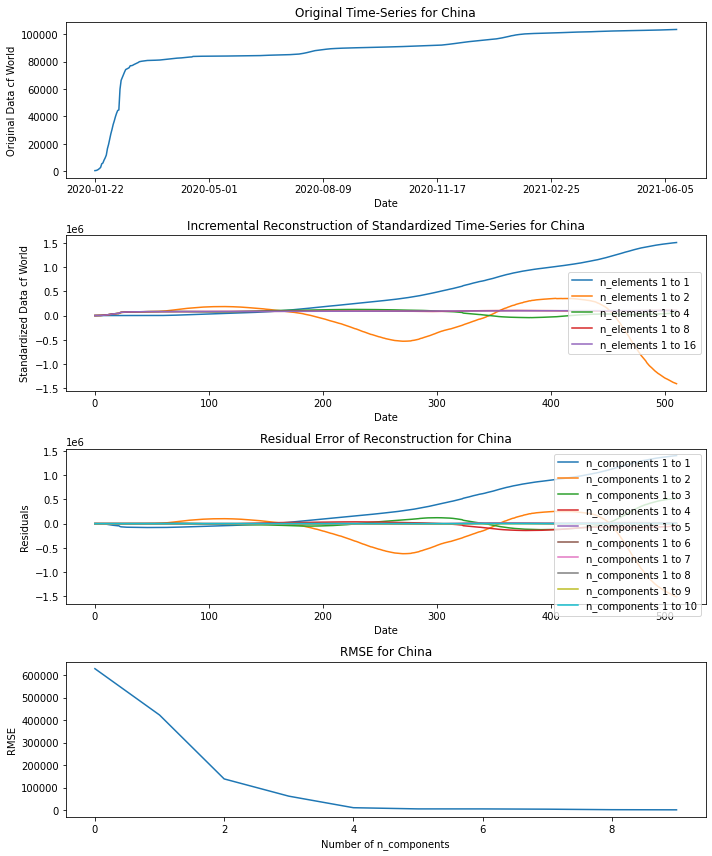

In [ ]:
plot_country_figures_svd(Covid, 'China')

**Analysis:**

There is no significant difference in the graphs above between PCA and SVD. Both of them work pretty well. It seems that SVD could perform better with very few n_components, while PCA usually requires a certain number of PCs to achieve a satisfactory result.

**Discussion:**

Standardization and covariance computation seems not required for SVD. PCA demands covariance computation to do the fitting, and as a result, standardization is supposed to be necessary for covariance computation, otherwise PCA could not work properly (with abnormal residual). However, SVD is not required to do the covariance computation, which saves the trouble of standardization.

In spite of this, doing standardization is usually recommended for SVD since it helps center the data, therefore here we still apply standardization for SVD in Part 4.

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving confirmed-oct29.csv to confirmed-oct29.csv


In [ ]:
import io

Covid_latest = pd.read_csv(io.BytesIO(uploaded['confirmed-oct29.csv']), index_col=0, thousands=',')
Covid_latest

,2020/1/22,2020/1/23,2020/1/24,2020/1/25,2020/1/26,2020/1/27,2020/1/28,2020/1/29,2020/1/30,2020/1/31,2020/2/1,2020/2/2,2020/2/3,2020/2/4,2020/2/5,2020/2/6,2020/2/7,2020/2/8,2020/2/9,2020/2/10,2020/2/11,2020/2/12,2020/2/13,2020/2/14,2020/2/15,2020/2/16,2020/2/17,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,2020/2/26,2020/2/27,2020/2/28,2020/2/29,2020/3/1,...,2021/9/20,2021/9/21,2021/9/22,2021/9/23,2021/9/24,2021/9/25,2021/9/26,2021/9/27,2021/9/28,2021/9/29,2021/9/30,2021/10/1,2021/10/2,2021/10/3,2021/10/4,2021/10/5,2021/10/6,2021/10/7,2021/10/8,2021/10/9,2021/10/10,2021/10/11,2021/10/12,2021/10/13,2021/10/14,2021/10/15,2021/10/16,2021/10/17,2021/10/18,2021/10/19,2021/10/20,2021/10/21,2021/10/22,2021/10/23,2021/10/24,2021/10/25,2021/10/26,2021/10/27,2021/10/28,2021/10/29
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,695744,707436,718963,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,386493,388470,390369,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8718,8752,8789,8830,8861,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,

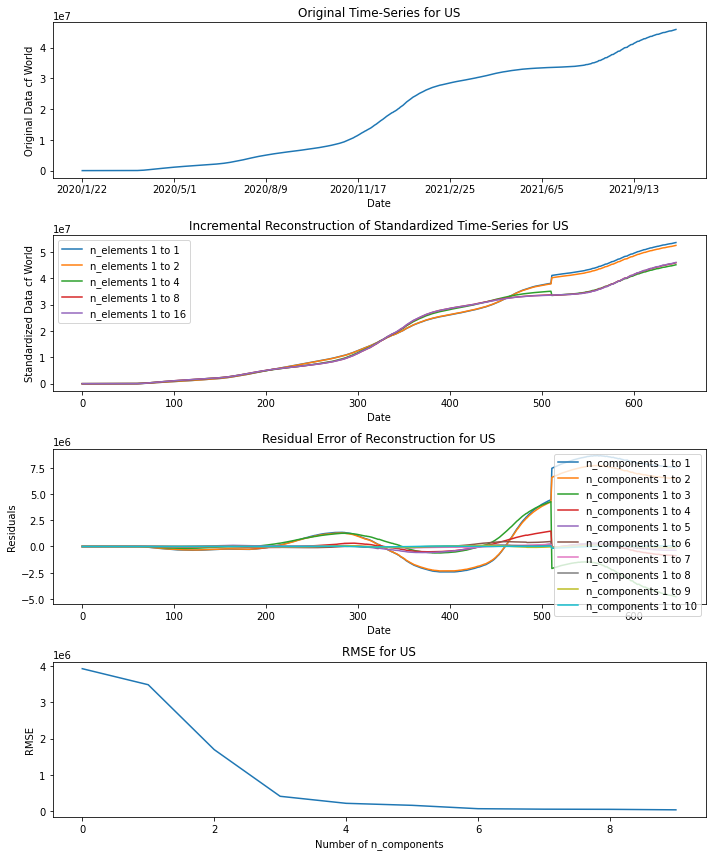

In [ ]:
plot_country_figures_svd(Covid_latest, 'US')

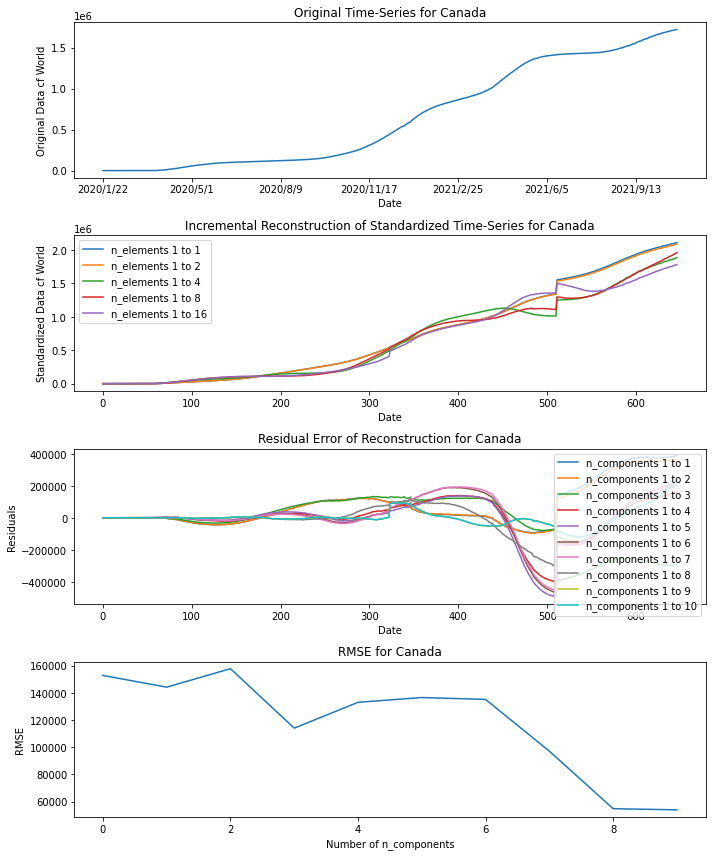

In [ ]:
plot_country_figures_svd(Covid_latest, 'Canada')

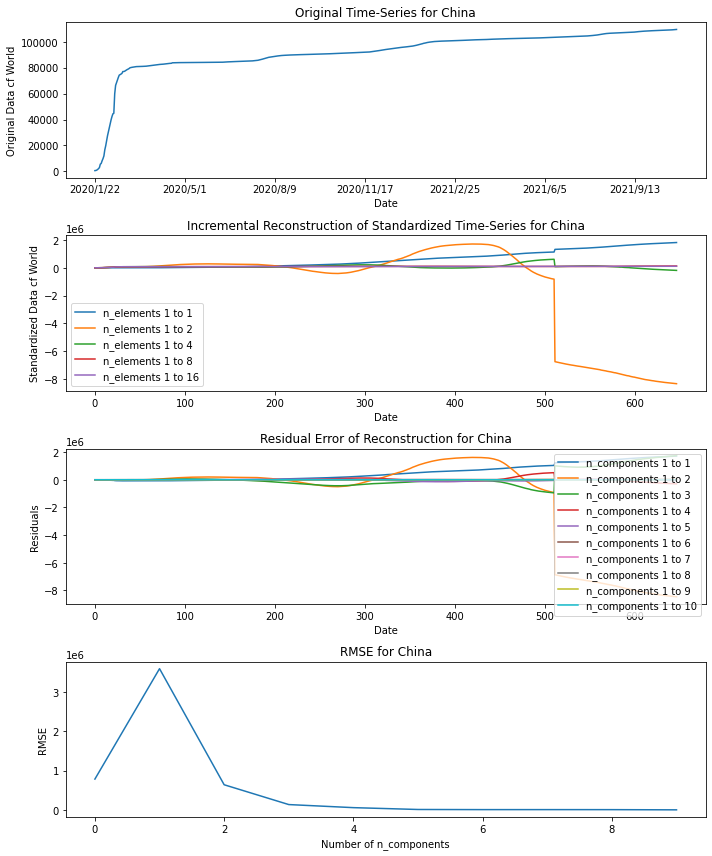

In [ ]:
plot_country_figures_svd(Covid_latest, 'China')

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

